### 📘 Linear Regression: Different Implementations

#### 📌 Introduction
This notebook demonstrates how to solve a simple linear regression problem using three different approaches:
1. **Scikit-Learn** (Traditional Machine Learning approach)
2. **TensorFlow** (Deep Learning framework)
3. **PyTorch** (Deep Learning framework)

We will use a dataset containing years of experience and corresponding salaries to predict future salaries.


In [1]:
## 📊 Step 1: Load and Explore the Data
import os 
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Dynamically construct the file path
base_dir = os.path.abspath(os.path.join(os.getcwd(),"..", "..", "..", "data", "01_Aprendizaje_Supervisado", "01_Regression"))
file_path = os.path.join(base_dir, "Salary Data.csv")
df = pd.read_csv(file_path)
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes


In [4]:
df.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


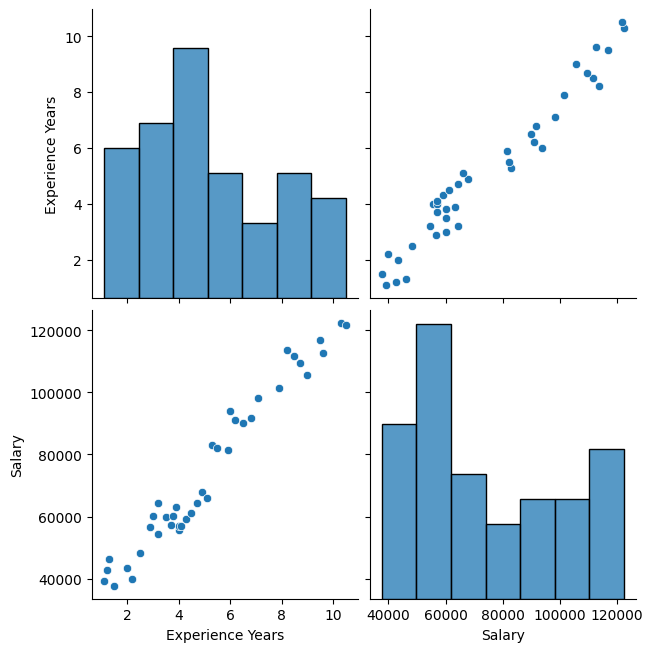

In [19]:
sns.pairplot(df, height=3.3, )
plt.show()

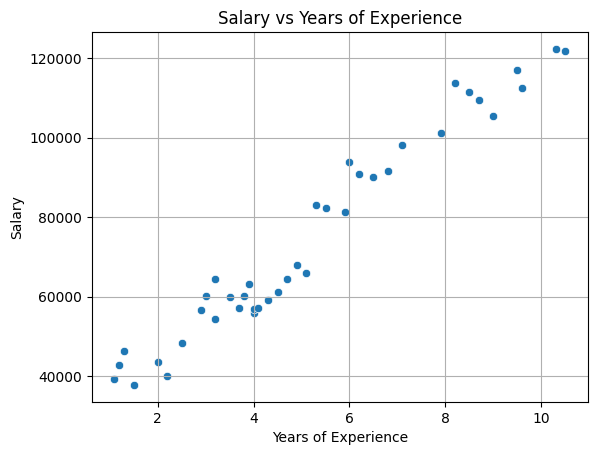

In [6]:
# Visualizing the dataset
plt.Figure(figsize=(10, 6))
sns.scatterplot(x='Experience Years', y='Salary', data=df)
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [7]:
# Splitting dataset into training and testing sets
X = df['Experience Years'].values
y = df['Salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print the shape of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (32,)
X_test shape: (8,)
y_train shape: (32,)
y_test shape: (8,)


Scikit-Learn Regression Model: y = 26716.25 + 9408.03 * X
Mean Squared Error: 48077731.16919359
R^2 Score: 0.9068577573647874


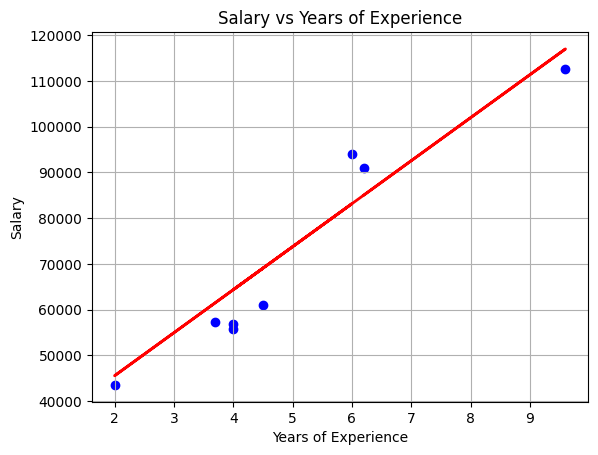

In [8]:
## 🏗️ Step 2: Linear Regression with Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Training the model
model = LinearRegression()
model.fit(X_train.reshape(-1,1), y_train)

# Making predictions
y_pred = model.predict(X_test.reshape(-1,1))

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Scikit-Learn Regression Model: y = {model.intercept_:.2f} + {model.coef_[0]:.2f} * X")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualizing the model
plt.Figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
TensorFlow Regression Model: y = 23787.46 + 9852.18 * X
Mean Squared Error: 43062060.0
R^2 Score: 0.9165747165679932


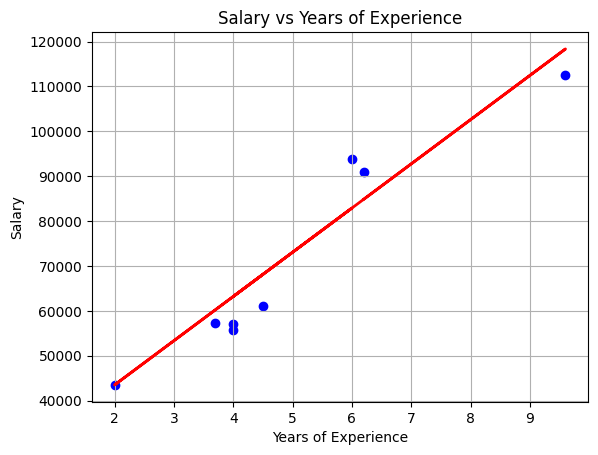

In [9]:
## 🤖 Step 3: Linear Regression with TensorFlow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Building the model
model = keras.Sequential()    
model.add(layers.Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse')

# Training the model
model.fit(X_train, y_train, epochs=500, verbose=0)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"TensorFlow Regression Model: y = {model.layers[0].get_weights()[1][0]:.2f} + {model.layers[0].get_weights()[0][0][0]:.2f} * X") 
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualizing the model
plt.Figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

PyTorch Regression Model: y = 23787.48 + 9852.17 * X
Mean Squared Error: 43062080.0
R^2 Score: 0.9165747165679932


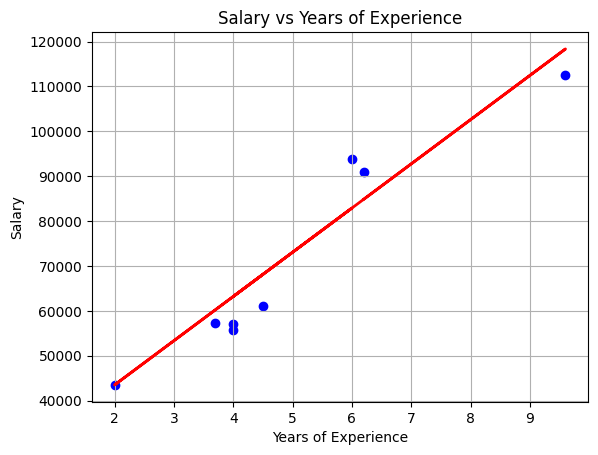

In [10]:
## 🔥 Step 4: Linear Regression with PyTorch
import torch 
import torch.nn as nn
import torch.optim as optim

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train).float()
X_test_tensor = torch.tensor(X_test).float()
y_train_tensor = torch.tensor(y_train).float()
y_test_tensor = torch.tensor(y_test).float()

# Building the model
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
for epoch in range(500):
    optimizer.zero_grad()
    y_pred = model(X_train_tensor.view(-1, 1))
    loss = criterion(y_pred.view(-1), y_train_tensor)
    loss.backward()
    optimizer.step()

# Making predictions
y_pred = model(X_test_tensor.view(-1, 1)).detach().numpy().flatten()

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"PyTorch Regression Model: y = {model.bias.item():.2f} + {model.weight[0].item():.2f} * X")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualizing the model
plt.Figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

## 📌 Understanding the R² Score

The **coefficient of determination (\( R^2 \))** measures how well our model explains the variability of the target variable:
- **\( R^2 = 1 \)** → Perfect fit: The model explains all the variability.
- **\( R^2 > 0.9 \)** → Strong fit: The model explains most of the variability.
- **\( R^2 \approx 0.5 \)** → Moderate fit: The model captures some trend but may need improvement.
- **\( R^2 < 0.5 \)** → Weak fit: The model does not explain much of the variability.
- **\( R^2 < 0 \)** → The model performs worse than predicting the mean.

### **Interpretation of Results**
- **Scikit-Learn Model:** \( R^2 = 0.9068 \) → Explains ~90.7% of salary variability.
- **TensorFlow Model:** \( R^2 = 0.9165 \) → Slightly better, explains ~91.6%.
- **PyTorch Model:** \( R^2 = 0.9165 \) → Matches TensorFlow’s result.

This suggests that all three implementations provide a **strong fit**, with slight variations due to optimization techniques.

---

## 📌 Conclusion
- **Scikit-Learn** provides a quick and efficient way to perform linear regression.
- **TensorFlow** and **PyTorch** allow for more flexibility, particularly in deep learning applications, but are overkill for simple linear regression.
- The results should be similar across all implementations, with minor variations in numerical optimization.
